In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
# from sklearn.externals import joblib
import statistics as stat
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import pickle

#Steps taken to clean up data 
1. Drop columns ()
2. change status data type to numerical
3. 

In [2]:
data = pd.read_csv('startup data.csv')

# Data Exploration

In [3]:
features= data.columns

In [4]:
test = data.sample(n=50)
test.head()
test.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [5]:
# test data
test = data.sample(n=50)
test.to_csv('test.csv')


In [6]:

with open('features3.txt', 'w') as f:
    f.write(f'FEATURES\n')
    for i in features:
        f.write(f'- {i}\n')

In [7]:
#Numeric data 
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data=data.select_dtypes(include=numeric)
with open('features3.txt', 'a') as f:
    f.write(f'\n NUMERIC FEATURES\n')
    for i in numeric_data.columns:
        f.write(f'- {i}\n')

In [8]:
#Categorical data 
categorical_data = data.select_dtypes(include="object")
with open('features3.txt', 'a') as f:
    f.write(f'\n CATEGORICAL FEATURES\n')
    for i in categorical_data.columns:
        f.write(f'- {i}\n')

In [9]:
#Missing columns
nulls = pd.DataFrame(data.isnull().sum(),columns=[ "Null Values Sum"])
nulls = nulls[nulls["Null Values Sum"] != 0]
# nulls = pd.DataFrame(nulls, columns =['one' , 'two'])
nulls = pd.DataFrame(nulls)
missing_cols = [nulls.index[x] for x in range(len(nulls))]
with open('features3.txt', 'a') as f:
    f.write(f'\n FEATURES WITH MISSING VALUES \n')
    for i in missing_cols:
        f.write(f'- {i}\n')

In [10]:
# to Drop
to_drop = ['id','object_id','status','state_code', 'city', 'state_code.1','name','zip_code', 'closed_at','latitude', 'longitude','Unnamed: 0','Unnamed: 6','founded_at','first_funding_at', 'last_funding_at']
len(to_drop)

with open('features3.txt', 'a') as f:
    f.write(f'\n DROP FEATURES  \n')
    for i in to_drop:
        f.write(f'- {i}\n')

In [11]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [12]:
data.head(), data.shape

(   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
 0        1005         CA  42.358880  -71.056820    92101   c:6669   
 1         204         CA  37.238916 -121.973718    95032  c:16283   
 2        1001         CA  32.901049 -117.192656    92121  c:65620   
 3         738         CA  37.320309 -122.050040    95014  c:42668   
 4        1002         CA  37.779281 -122.419236    94105  c:65806   
 
             city              Unnamed: 6               name  labels  ...  \
 0      San Diego                     NaN        Bandsintown       1  ...   
 1      Los Gatos                     NaN          TriCipher       1  ...   
 2      San Diego      San Diego CA 92121              Plixi       1  ...   
 3      Cupertino      Cupertino CA 95014  Solidcore Systems       1  ...   
 4  San Francisco  San Francisco CA 94105     Inhale Digital       0  ...   
 
   object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
 0    c:6669      0         1     

In [13]:
#numeric data 
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data=data.select_dtypes(include=numeric)
numeric_data.shape, numeric_data.columns

((923, 35),
 Index(['Unnamed: 0', 'latitude', 'longitude', 'labels',
        'age_first_funding_year', 'age_last_funding_year',
        'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
        'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
        'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
        'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
        'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
        'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
        'avg_participants', 'is_top500'],
       dtype='object'))

In [14]:
corr_data = numeric_data.corr().abs()
corr_data = corr_data.unstack()
corr_data = corr_data.sort_values(kind='quicksort')
top_corr = corr_data[29:]
top_corr[::-1]

is_top500                 is_top500                   1.000000
is_otherstate             is_otherstate               1.000000
has_roundC                has_roundC                  1.000000
has_roundB                has_roundB                  1.000000
has_roundA                has_roundA                  1.000000
                                                        ...   
is_advertising            age_first_milestone_year    0.002213
age_first_milestone_year  is_advertising              0.002213
is_ecommerce              has_VC                      0.002175
has_VC                    is_ecommerce                0.002175
age_last_milestone_year   is_biotech                  0.001892
Length: 1196, dtype: float64

In [15]:
#correlation between numeric parameters 
numeric_data.corr()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.054726,0.023292,-0.068721,-0.004507,-0.116533,-0.135614,-0.131698,-0.079950,-0.118456,...,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019
latitude,0.054726,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,...,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.023292,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,...,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
labels,-0.068721,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.162279,0.265871,0.360434,0.206049,...,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
age_first_funding_year,-0.004507,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,...,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,...,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.135614,-0.072000,-0.051674,0.162279,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,...,0.063367,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329
age_last_milestone_year,-0.131698,-0.054275,-0.087701,0.265871,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,...,0.047602,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859
relationships,-0.079950,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,...,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.118456,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,...,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345


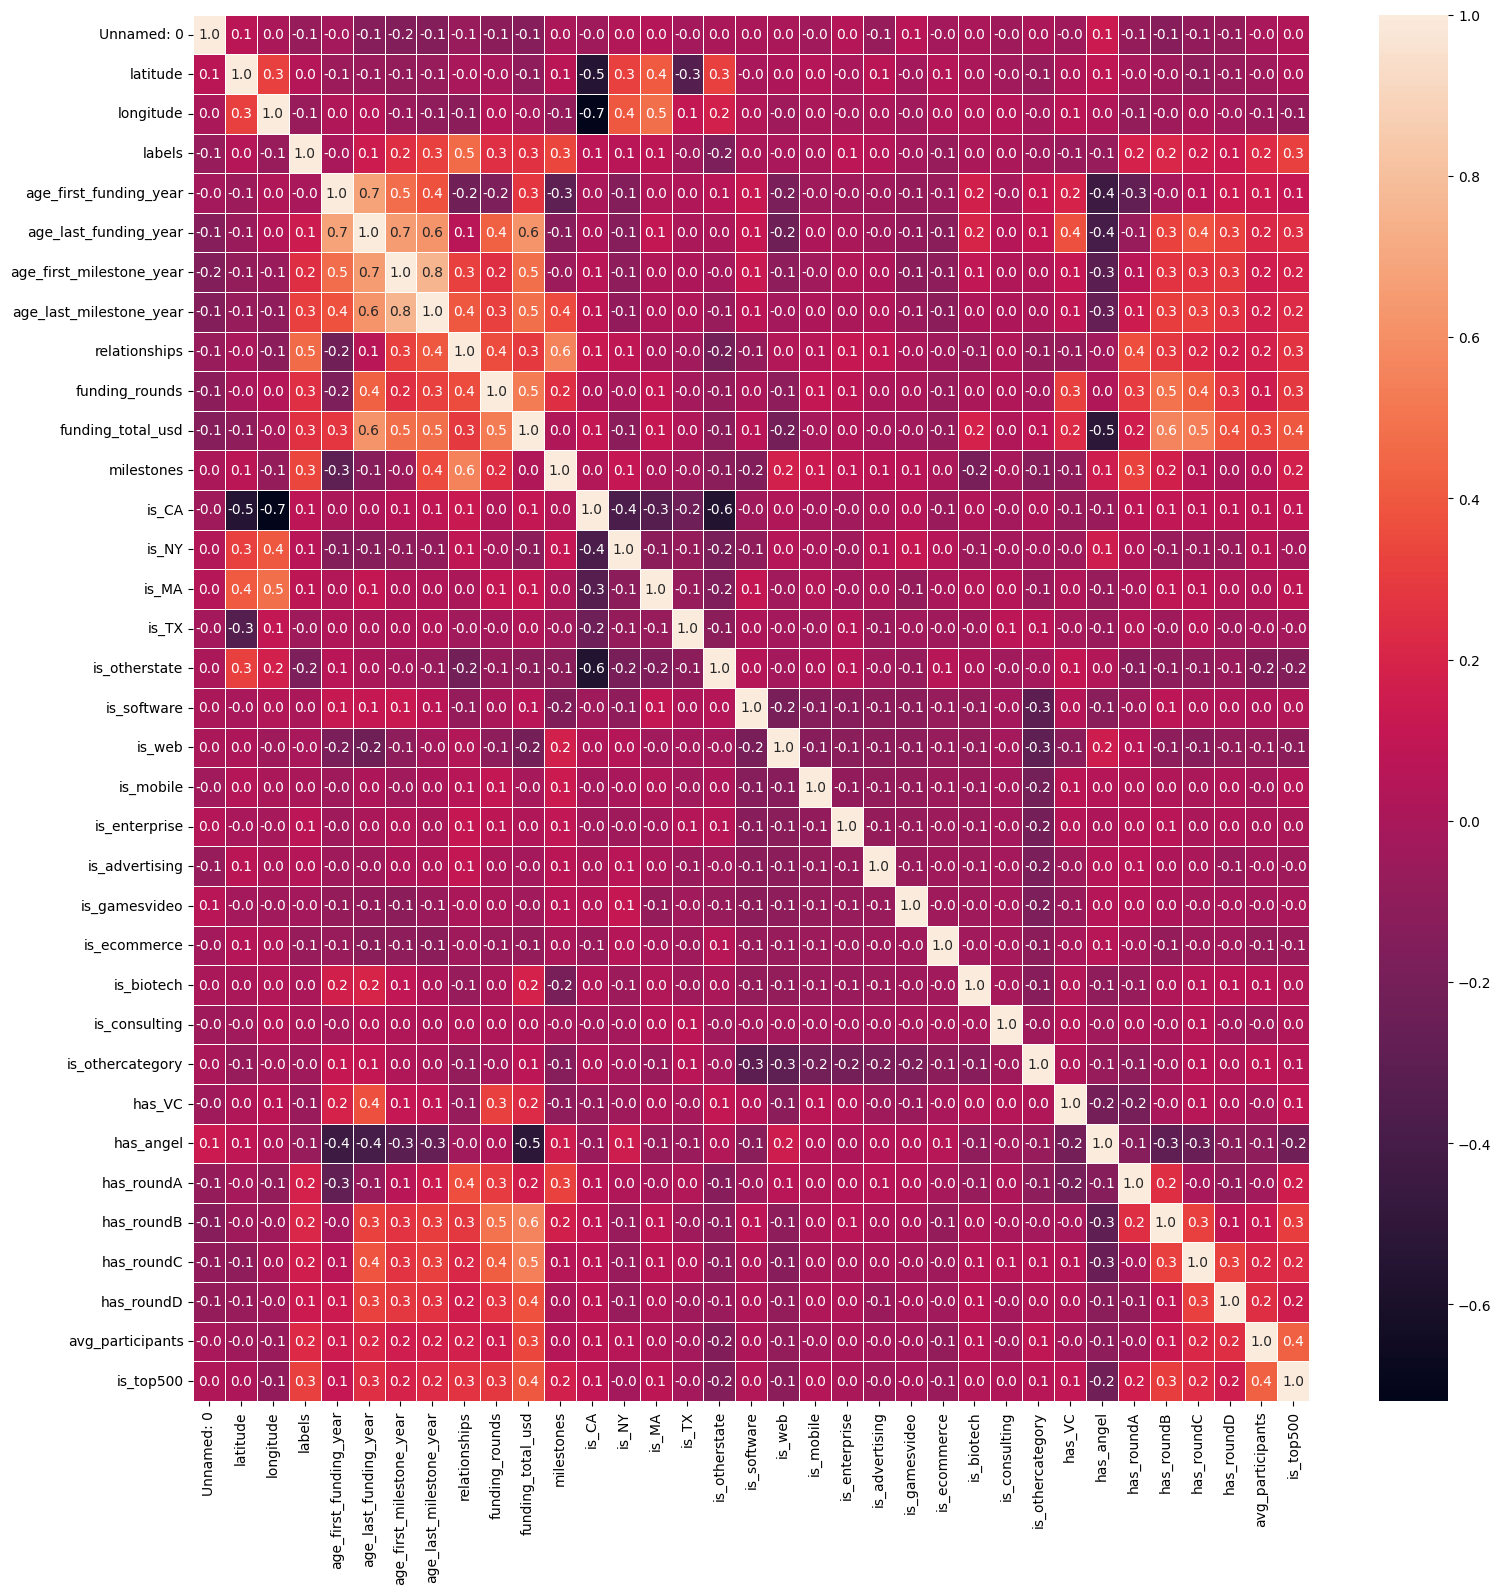

In [16]:
#numeric data 
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data=data.select_dtypes(include=numeric)
numeric_data.shape, numeric_data.columns



def heatmap(df):
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = df.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()

heatmap(numeric_data)

In [17]:
#Categorical data 
categorical_data = data.select_dtypes(include="object")
categorical_data.shape, categorical_data.columns

((923, 14),
 Index(['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name',
        'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
        'state_code.1', 'category_code', 'object_id', 'status'],
       dtype='object'))

In [18]:
# Get unique values of Status 
data.status.unique()

array(['acquired', 'closed'], dtype=object)

## Innitial Observations 
* We have 2 unnamed columns
* 923 rows 
* 49 features 
* 35 features are numeric 
* 14 features are onjects
* 5 columns have missing values 


# Data Preprocessing

Change the values for status to numerical 

In [19]:
data.status.unique()

array(['acquired', 'closed'], dtype=object)

In [20]:
#change the values of Status Aquired = 1 and closed = 0 
data['status'] = data.status.map(lambda x: 1 if x=='acquired' else 0)
data.status.unique()

array([1, 0])

# Handling Missing Values 

In [21]:
# explore missing Values Column 
data[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


The results of the analysis in the column containing Missing Values ​​include:
* Column "Unnamed: 6" is a column of information from a combination of several tables including:
"city", "state_code" and "zip_code" fields
* The "closed_at" column is the column where the StartUp is "Closed" so the empty data should indeed be a StarUp whose status is still on or "Acquired"
* The age_first_milestone_year column is information when the milestone was first performed in years
This column has a total of 771 rows of data with a Mean 3.055353 and a median of 2.520500 indicating that the data distribution is not normal.
* The age_Last_milestone_year column is information when the last milestone was carried out in years
This column has a total of 771 rows of data with a mean of 4.754423 and a median of 4.476700 which shows that the data distribution is not normal.

In [22]:
#filled in missing values using the mean 
mean_value_first = data['age_first_milestone_year'].mean()
data['age_first_milestone_year'].fillna(value=mean_value_first, inplace=True)
mean_value_last = data['age_last_milestone_year'].mean()
data['age_last_milestone_year'].fillna(value=mean_value_last, inplace=True)

In [23]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values Sum"])
null["% Null Values"]= (data.isna().sum()/len(data)*100)
null = null[null["% Null Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values Sum,% Null Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
state_code.1,1,0.108342


In [24]:
data[['status', 'Unnamed: 6','labels']].head(7)

,status,Unnamed: 6,labels
0,1,NaN,1
1,1,NaN,1
2,1,San Diego CA 92121,1
3,1,Cupertino CA 95014,1
4,0,San Francisco CA 94105,0
5,0,Mountain View CA 94043,0
6,1,NaN,1


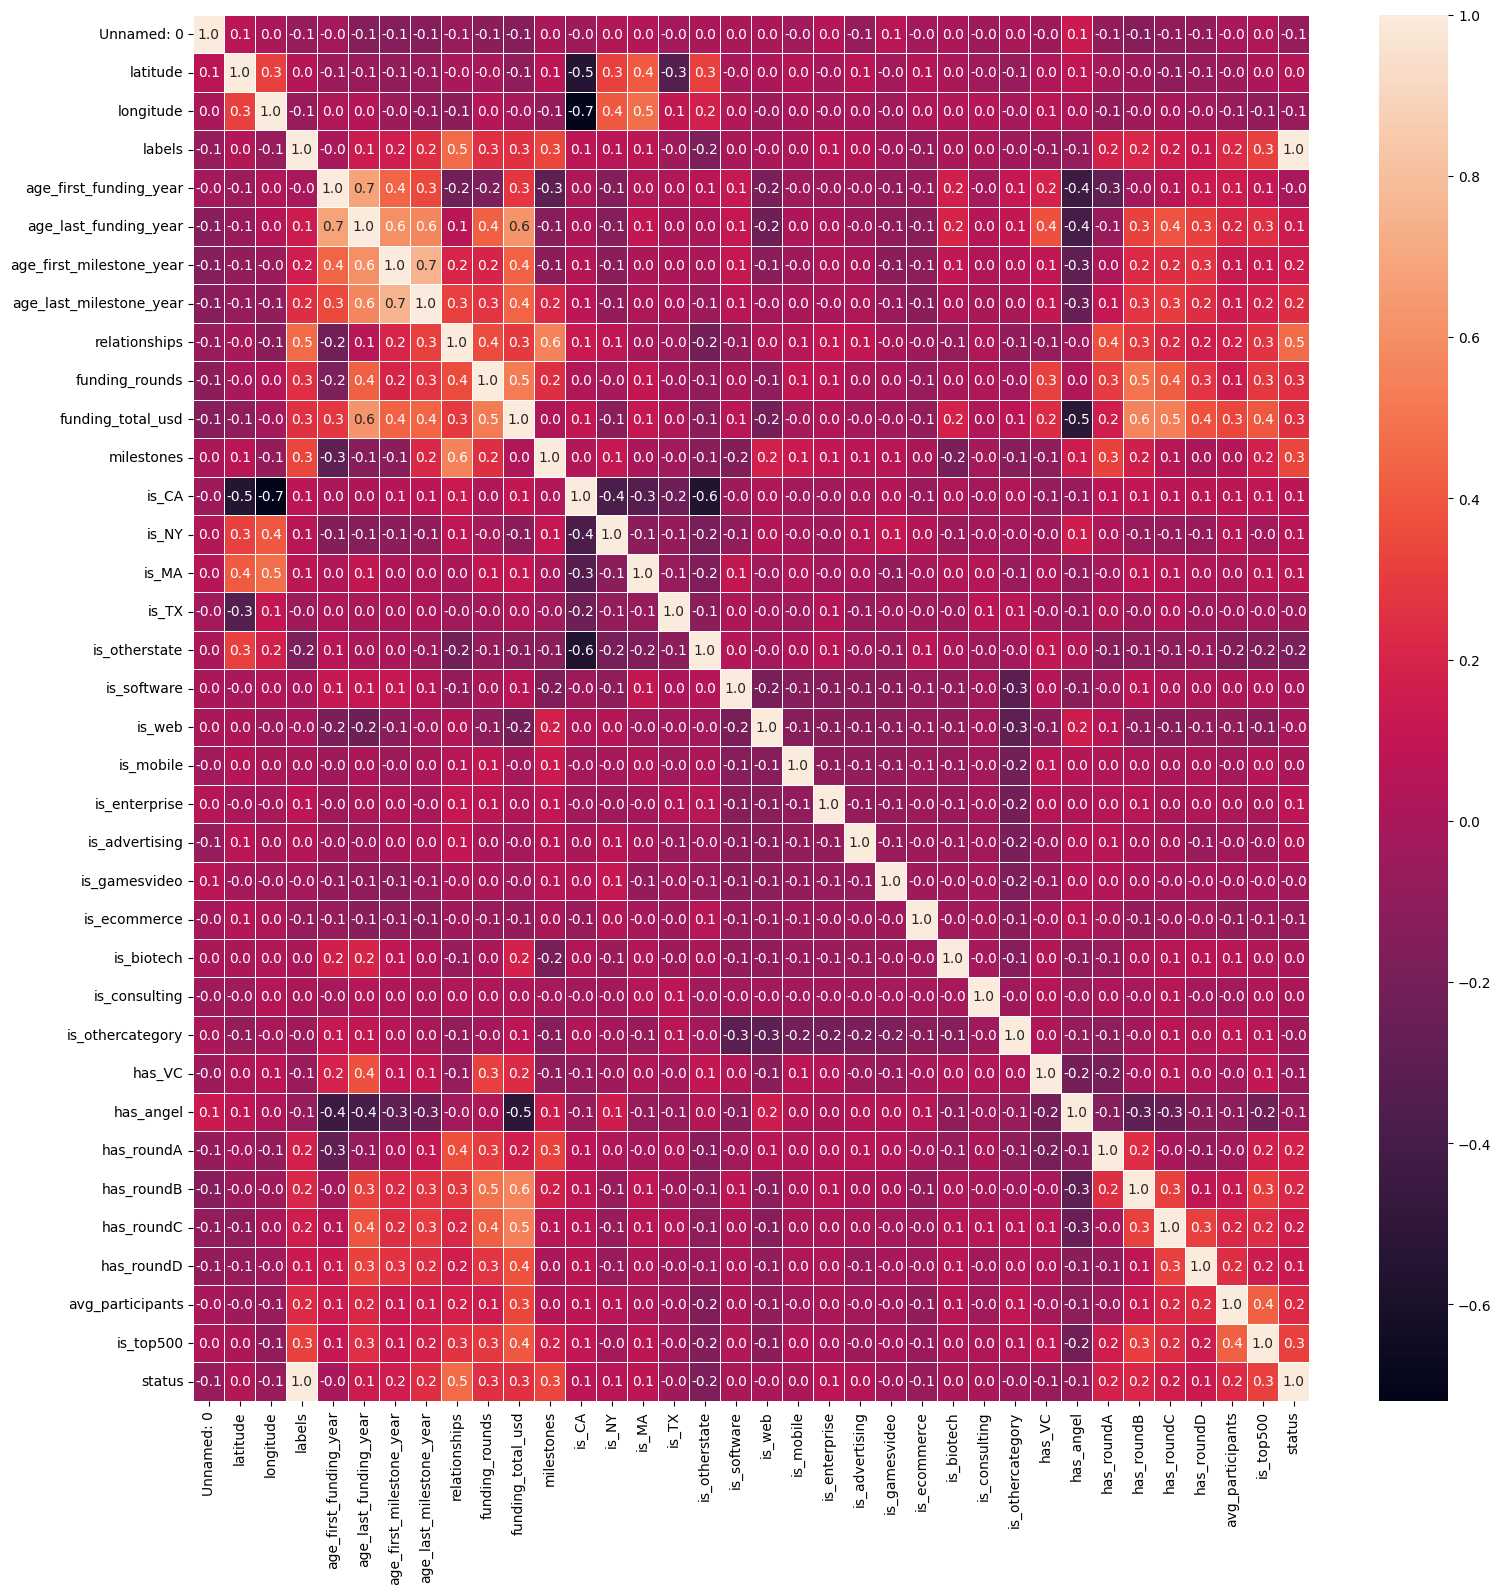

In [25]:
#numeric data 
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data=data.select_dtypes(include=numeric)
numeric_data.shape, numeric_data.columns

def heatmap(df):
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = df.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()

heatmap(numeric_data)

# Feature Engineering

In [26]:
#droping id and object_id because they seem to be unique identifiers and they are the same values 
#state code1 is the same as state code hence deletion
# closed_at  and label are the same as status 
data = data.drop(columns=['id','object_id','status','state_code', 'city', 'state_code.1','name','zip_code', 'closed_at','latitude', 'longitude','Unnamed: 0','Unnamed: 6','founded_at','first_funding_at', 'last_funding_at'])
data.shape


(923, 33)

In [27]:
data.to_csv('alldata_before_encoding.csv')
#Categorical data 
categorical_data = data.select_dtypes(include="object")
categorical_data.shape, categorical_data.columns

((923, 1), Index(['category_code'], dtype='object'))

In [28]:
#numeric data 
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data=data.select_dtypes(include=numeric)
numeric_data.shape, numeric_data.columns

((923, 32),
 Index(['labels', 'age_first_funding_year', 'age_last_funding_year',
        'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
        'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
        'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
        'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
        'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
        'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
        'avg_participants', 'is_top500'],
       dtype='object'))

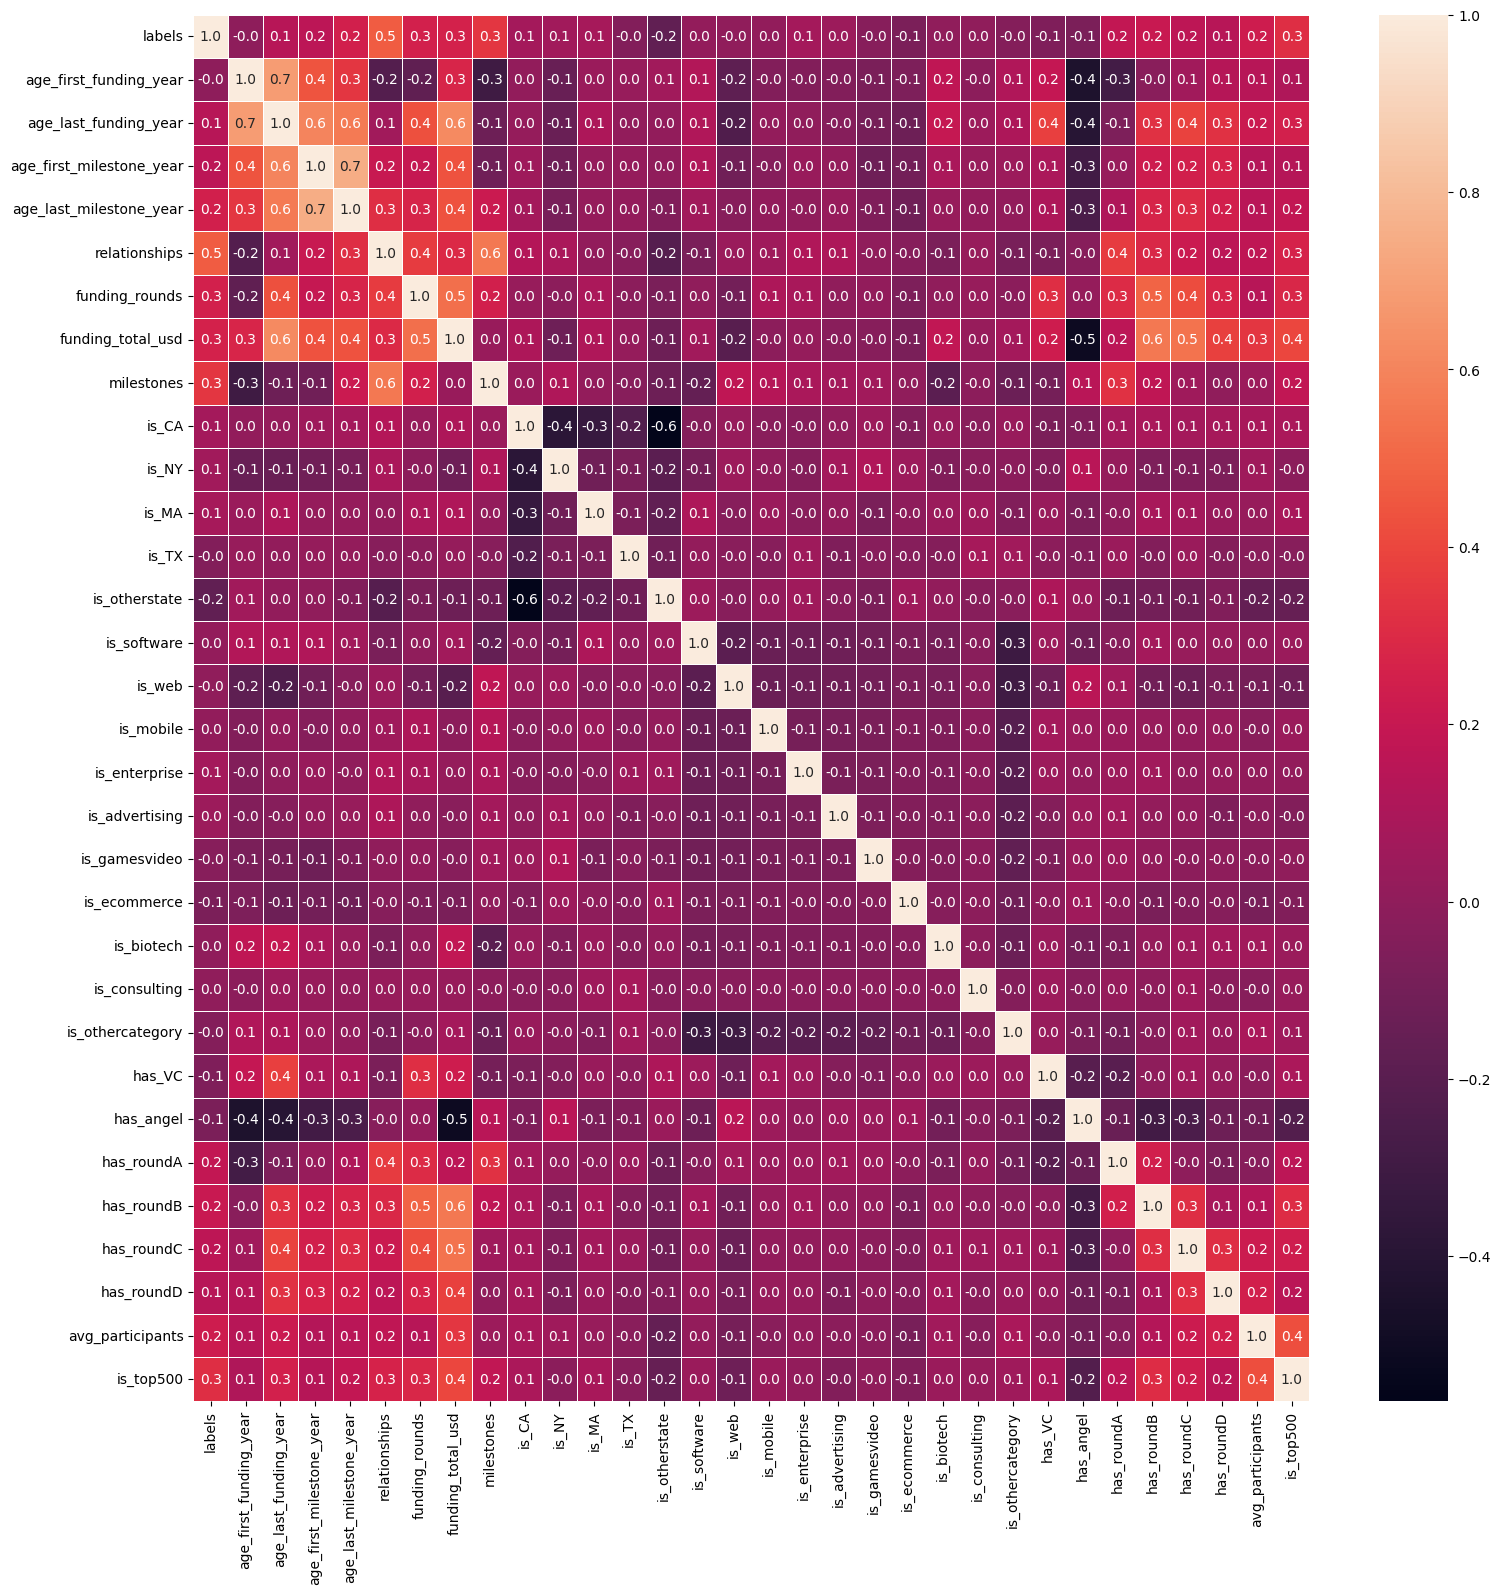

In [29]:
#numeric data 
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data=data.select_dtypes(include=numeric)
numeric_data.shape, numeric_data.columns

def heatmap(df):
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = df.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()

heatmap(numeric_data)

In [30]:
#one hot encoding 
#'founded_at','first_funding_at', 'last_funding_at'

# final_data = pd.get_dummies(data, columns=['state_code', 'city', 'category_code'])
final_data = pd.get_dummies(data, columns=['category_code'])
final_data.columns, final_data.shape

(Index(['labels', 'age_first_funding_year', 'age_last_funding_year',
        'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
        'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
        'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
        'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
        'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
        'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
        'avg_participants', 'is_top500', 'category_code_advertising',
        'category_code_analytics', 'category_code_automotive',
        'category_code_biotech', 'category_code_cleantech',
        'category_code_consulting', 'category_code_ecommerce',
        'category_code_education', 'category_code_enterprise',
        'category_code_fashion', 'category_code_finance',
        'category_code_games_video', 'category_code_hardware',
        'category_code_health

# Data Modelling 

In [31]:
final_data.columns

Index(['labels', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'category_code_advertising',
       'category_code_analytics', 'category_code_automotive',
       'category_code_biotech', 'category_code_cleantech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_education', 'category_code_enterprise',
       'category_code_fashion', 'category_code_finance',
       'category_code_games_video', 'category_code_hardware',
       'category_code_health', 'category_co

In [32]:
# #Send the data to CSV 
# final_data.to_csv('final_data.csv')

In [33]:
#Create X, y datasets
X = final_data.drop(columns =['labels'])
print(X.shape)
y = final_data.labels

(923, 66)


In [34]:
X.to_csv('test_data.csv')
features = list(X.columns)
len(features)

66

In [35]:
with open('features.txt', 'w') as f:
    for i in features:
        f.write(f'{i} ')

In [36]:
with open('features2.txt', 'w') as f:
    for i in features:
        f.write(f'{i}\n')

Logistic Regression

In [37]:
reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.3)# removed the random_state =0 , so results can change
reg.fit(X_train,y_train)
reg.score(X_train,y_train), reg.score(X_test,y_test)

(0.6439628482972136, 0.6534296028880866)

In [38]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, reg.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, reg.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.3560
Test Set Mean Absolute Error: 0.3466


In [39]:
to_be_predicted = final_data.iloc[10:12]
print(to_be_predicted.shape)
to_be_predicted['labels']

(2, 67)


10    1
11    0
Name: labels, dtype: int64

In [40]:
pred = to_be_predicted.drop(columns =['labels'])
print(pred.shape)
pred.head()

(2, 66)


,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web
10,4.6274,9.4493,10.1342,10.6493,22,3,27500000,3,1,0,...,0,0,0,0,0,0,0,0,0,0
11,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
pred.iloc[0]

age_first_funding_year           4.6274
age_last_funding_year            9.4493
age_first_milestone_year        10.1342
age_last_milestone_year         10.6493
relationships                   22.0000
                                 ...   
category_code_software           0.0000
category_code_sports             0.0000
category_code_transportation     0.0000
category_code_travel             0.0000
category_code_web                0.0000
Name: 10, Length: 66, dtype: float64

In [42]:
# pred = np.array(pred[0])

reg.predict([pred.iloc[0]])

/home/claire/Documents/projects/uption/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [44]:
# save the model to disk
filename = 'startup_classifier_output_v0.3.0.pkl'
pickle.dump(reg, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.6534296028880866